In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk import*
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

import matplotlib.pyplot as plt
from datetime import datetime

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
# Algorithm XGBoost
! pip install xgboost

# Showing Up the Data

In [2]:
myData = pd.read_csv(r'D:\Mechatronics Department\Machine Learning on Cloud\AWS Academy Machine Learning Foundations\Projects\Sentiment Analysis\Reviews.csv')
myData

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...
...,...,...
34655,3.0,This is not appreciably faster than any other ...
34656,1.0,Amazon should include this charger with the Ki...
34657,1.0,Love my Kindle Fire but I am really disappoint...
34658,1.0,I was surprised to find it did not come with a...


In [3]:
myData.rename(columns={'reviews.rating':'rating' , 'reviews.text':'text'}, inplace=True)

In [4]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  34627 non-null  float64
 1   text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [6]:
myData.isnull().sum()

rating    33
text       1
dtype: int64

In [10]:
myData.describe() # Will describe only categorical values ==> equal myData['rating'].describe()

,rating
count,34627.000000
mean,4.584573
std,0.735653
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [14]:
for i in ['rating','text']:
    percentage_per_col = ((myData[i].isnull().sum() / myData.shape[0])*100)
    print(f'Percentage of the Missing values relative to the columns {i} data in col rating is {percentage_per_col:0.3f} %')
#print(f'Percentage of the Missing values relative to the whole dataset: {((myData.['reviews.rating'].isnull().sum())/myData.shape[0])*100:0.3f} %')

Percentage of the Missing values relative to the columns rating data in col rating is 0.095 %
Percentage of the Missing values relative to the columns text data in col rating is 0.003 %


### Handling Missing values
Numerical Values

In [15]:
most_frequent = myData['rating'].mode()
myData['rating'].fillna(most_frequent[0], inplace=True)

There is a null value in text column and it will be dropped!

In [16]:
myData.drop(3111, inplace = True)

In [17]:
myData.isnull().sum()

rating    0
text      0
dtype: int64

In [18]:
myData['rating'].value_counts()

5.0    23807
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64

<AxesSubplot:title={'center':'Counts of Reviews'}>

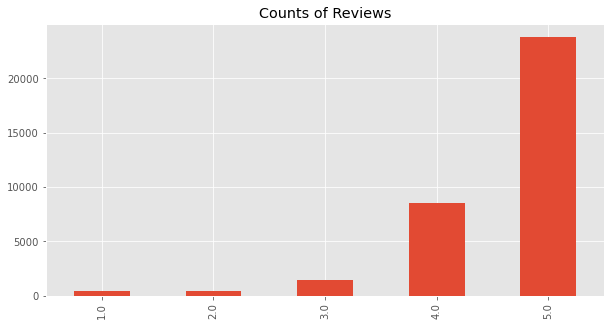

In [19]:
myData['rating'].value_counts().sort_index().plot(kind ='bar' , title = 'Counts of Reviews', figsize = (10,5))

### Rearrange the rows of the data

In [20]:
new_ratings = {1.0:0 , 2.0:0 , 3.0:0 , 4.0:0 ,5.0:1}
myData.replace(new_ratings , inplace=True)
myData

,rating,text
0,1.0,This product so far has not disappointed. My c...
1,1.0,great for beginner or experienced person. Boug...
2,1.0,Inexpensive tablet for him to use and learn on...
3,0.0,I've had my Fire HD 8 two weeks now and I love...
4,1.0,I bought this for my grand daughter when she c...
...,...,...
34655,0.0,This is not appreciably faster than any other ...
34656,0.0,Amazon should include this charger with the Ki...
34657,0.0,Love my Kindle Fire but I am really disappoint...
34658,0.0,I was surprised to find it did not come with a...


<AxesSubplot:title={'center':'Counts of Reviews'}>

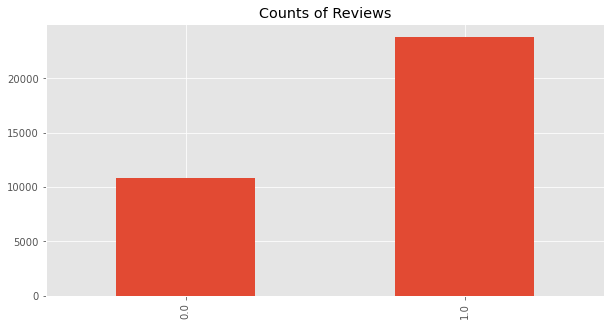

In [21]:
myData['rating'].value_counts().sort_index().plot(kind ='bar' , title = 'Counts of Reviews', figsize = (10,5))

In [22]:
myData['rating'].value_counts()

1.0    23807
0.0    10852
Name: rating, dtype: int64

# Normalizing the text

#### Removing stopwords
that might impact sentiment You could remove all the stopwords, but you might want to keep the stopwords that could impact the sentiment, such as not or don't.

A few stopwords to exclude have been provided. Update the function to remove other words that might impact sentiment.

In [24]:
stop = stopwords.words('english')
def remove_stopwords(stopwords):
    # Implement this function
    excluding = ['against', 'not', 'don', 'don\'t','ain', 'are', 'aren\'t']
    ### BEGIN_SOLUTION
    excluding = ['against', 'not', 'don', 'don\'t','ain', 'are', 'aren\'t', 'could', 'couldn\'t',
             'did', 'didn\'t', 'does', 'doesn\'t', 'had', 'hadn\'t', 'has', 'hasn\'t', 
             'have', 'haven\'t', 'is', 'isn\'t', 'might', 'mightn\'t', 'must', 'mustn\'t',
             'need', 'needn\'t','should', 'shouldn\'t', 'was', 'wasn\'t', 'were', 
             'weren\'t', 'won\'t', 'would', 'wouldn\'t']
    ### END_SOLUTION
    return [word for word in stop if word not in excluding]

# New stopword list
stopwords = remove_stopwords(stop)

In [25]:
snow = SnowballStemmer('english')
def clean(sent):
    # Implement this function
    sent = sent.lower()
    sent = re.sub('\s+', ' ', sent)
    ### BEGIN_SOLUTION
    sent = sent.strip()
    sent = re.compile('<.*?>').sub('',sent)
    ### END_SOLUTION
    filtered_sentence = []
    
    for w in word_tokenize(sent):
        # You are applying custom filtering here. Feel free to try different things.
        # Check if it is not numeric, its length > 2, and it is not in stopwords
        if(not w.isnumeric()) and (len(w)>2) and (w not in stopwords):  
            # Stem and add to filtered list
            filtered_sentence.append(snow.stem(w))
    final_string = " ".join(filtered_sentence) #final string of cleaned words
    return final_string

In [26]:
myData['Updated_review'] =myData['text'].apply(clean,remove_stopwords)
myData

,rating,text,Updated_review
0,1.0,This product so far has not disappointed. My c...,product far has not disappoint children love u...
1,1.0,great for beginner or experienced person. Boug...,great beginn experienc person bought gift love
2,1.0,Inexpensive tablet for him to use and learn on...,inexpens tablet use learn step nabi was thrill...
3,0.0,I've had my Fire HD 8 two weeks now and I love...,ve had fire two week love tablet great value.w...
4,1.0,I bought this for my grand daughter when she c...,bought grand daughter come visit set user ente...
...,...,...,...
34655,0.0,This is not appreciably faster than any other ...,not appreci faster 1.8 higher amp charger use ...
34656,0.0,Amazon should include this charger with the Ki...,amazon should includ charger kindl fact re cha...
34657,0.0,Love my Kindle Fire but I am really disappoint...,love kindl fire realli disappoint kindl power ...
34658,0.0,I was surprised to find it did not come with a...,was surpris find did not come type charg cord ...


## Splitting the data into datasets for training, validation, and testing

In [110]:
from sklearn.model_selection import train_test_split
# uncomment the following lines and implement your solution
def split_data(df):
    # train, test_and_validate = train_test_split(....)
    # test, validate = train_test_split(....)
    ### BEGIN_SOLUTION
    train, test_and_validate = train_test_split(myData,
                                            test_size=0.2,
                                            shuffle=True,
                                            random_state=324
                                            )
    test, validate = train_test_split(test_and_validate,
                                                test_size=0.5,
                                                shuffle=True,
                                                random_state=324)
    ### END_SOLUTION
    return train, validate, test

In [111]:
train, validate, test = split_data(myData)

print(train.shape)
print(test.shape)
print(validate.shape)

(27727, 3)
(3466, 3)
(3466, 3)


## Assembling the processing pipeline
The pipeline has been updated to include a call to the previously defined clean function from the CountVectorizer. This function will take a little longer to run.

In [94]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

text_features = 'Updated_review'
model_target = 'rating'

text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(max_features=500))
])

data_preprocessor = ColumnTransformer([
    ('text_pre_0', text_processor_0, text_features)
])

print('Datasets shapes before processing: ', train.shape, validate.shape, test.shape)
train_matrix = data_preprocessor.fit_transform(train)
test_matrix = data_preprocessor.transform(test)
validate_matrix = data_preprocessor.transform(validate)
print('Datasets shapes after processing: ', f'train_matrix: {train_matrix.shape}', f'validate_matrix: {validate_matrix.shape}', 
      f'test_matrix: {test_matrix.shape}')


Datasets shapes before processing:  (27727, 3) (3466, 3) (3466, 3)
Datasets shapes after processing:  train_matrix: (27727, 500) validate_matrix: (3466, 500) test_matrix: (3466, 500)
Wall time: 1.09 s


### Splittng the data again

In [95]:
X_train , y_train = train_matrix ,train_matrix
X_test , y_test =   test_matrix , test_matrix
X_val ,y_val =      validate_matrix, validate_matrix
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(27727, 500) (27727, 500) (3466, 500) (3466, 500)


In [96]:
# Algorithm XGBoost
import xgboost
xgboost_classifier = xgboost.XGBClassifier()

In [106]:
xgboost_classifier.fit(X_train,y_train)
y_pred = xgboost_classifier.predict(X_test)

AttributeError: 'bool' object has no attribute 'all'

## Evaluation Metrics

In [108]:

def plot_confusion_matrix(test_labels, target_predicted):
    matrix = confusion_matrix(test_labels, target_predicted)
    df_confusion = pd.DataFrame(matrix)
    colormap = sns.color_palette("BrBG", 10)
    sns.heatmap(df_confusion, annot=True, fmt='.2f', cbar=None, cmap=colormap)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()
    
def print_metrics(test_labels, target_predicted_binary):
    TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted_binary).ravel()
    # Sensitivity, hit rate, recall, or true positive rate
    Sensitivity  = float(TP)/(TP+FN)*100
    # Specificity or true negative rate
    Specificity  = float(TN)/(TN+FP)*100
    # Precision or positive predictive value
    Precision = float(TP)/(TP+FP)*100
    # Negative predictive value
    NPV = float(TN)/(TN+FN)*100
    # Fall out or false positive rate
    FPR = float(FP)/(FP+TN)*100
    # False negative rate
    FNR = float(FN)/(TP+FN)*100
    # False discovery rate
    FDR = float(FP)/(TP+FP)*100
    # Overall accuracy
    ACC = float(TP+TN)/(TP+FP+FN+TN)*100

    print(f"Sensitivity or TPR: {Sensitivity}%")    
    print(f"Specificity or TNR: {Specificity}%") 
    print(f"Precision: {Precision}%")   
    print(f"Negative Predictive Value: {NPV}%")  
    print( f"False Positive Rate: {FPR}%") 
    print(f"False Negative Rate: {FNR}%")  
    print(f"False Discovery Rate: {FDR}%" )
    print(f"Accuracy: {ACC}%") 

